In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Project sem1/Datasets/Annual_Mean_Global_Surface_Temperature.csv')

print(df.head())


   ObjectId                       Country ISO2    ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF     AFG   
1         2                        Africa  NaN  AFRTMP   
2         3                       Albania   AL     ALB   
3         4                       Algeria   DZ     DZA   
4         5                American Samoa   AS     ASM   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture

In [ ]:
df = df.drop('ISO2', axis=1)

print(df.head())

   ObjectId                       Country    ISO3  \
0         1  Afghanistan, Islamic Rep. of     AFG   
1         2                        Africa  AFRTMP   
2         3                       Albania     ALB   
3         4                       Algeria     DZA   
4         5                American Samoa     ASM   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of the Unite... 

In [ ]:
df.dtypes

,0
ObjectId,int64
Country,object
ISO3,object
Indicator,object
Unit,object
...,...
2019,float64
2020,float64
2021,float64
2022,float64


In [ ]:
# Find all unique countries in the DataFrame
unique_countries = df['Country'].unique()

# Print the unique countries
unique_countries

array(['Afghanistan, Islamic Rep. of', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Americas', 'Andorra, Principality of', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia, Rep. of', 'Aruba, Kingdom of the Netherlands', 'Asia',
       'Australia', 'Austria', 'Azerbaijan, Rep. of', 'Bahamas, The',
       'Bahrain, Kingdom of', 'Bangladesh', 'Barbados',
       'Belarus, Rep. of', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Rep.', 'Chad',
       'Chile', 'China, P.R.: Hong Kong', 'China, P.R.: Macao',
       'China, P.R.: Mainland', 'Colombia', 'Comoros, Union of the',
       'Congo, Dem. Rep. of the', 'Congo, Rep. of', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia, 

In [ ]:
# Filter the DataFrame for rows where 'Country' is 'India'
india_data = df[df['Country'] == 'India']

# Find and print the null/missing values in the filtered DataFrame
print(india_data.isnull().sum())
print(india_data.isnull().sum().sum())

ObjectId     0
Country      0
ISO3         0
Indicator    0
Unit         0
            ..
2019         0
2020         0
2021         0
2022         0
2023         0
Length: 72, dtype: int64
0


[-0.214 -0.526 -0.062  0.002 -0.053  0.308 -0.213 -0.224  0.323  0.061
 -0.485  0.019  0.346  0.033 -0.299  0.01   0.162 -0.161  0.299  0.391
  0.068 -0.021 -0.165 -0.15   0.179  0.163  0.564  0.479 -0.029 -0.098
  0.179  0.017  0.211  0.1    0.224  0.319 -0.092  0.588  0.467  0.356
  0.479  0.831  0.689  0.57   0.606  0.685  0.636  0.303  1.176  1.159
  0.364  0.487  0.445  0.536  0.705  1.077  0.962  0.881  0.813  0.529
  0.734  0.784  0.894]


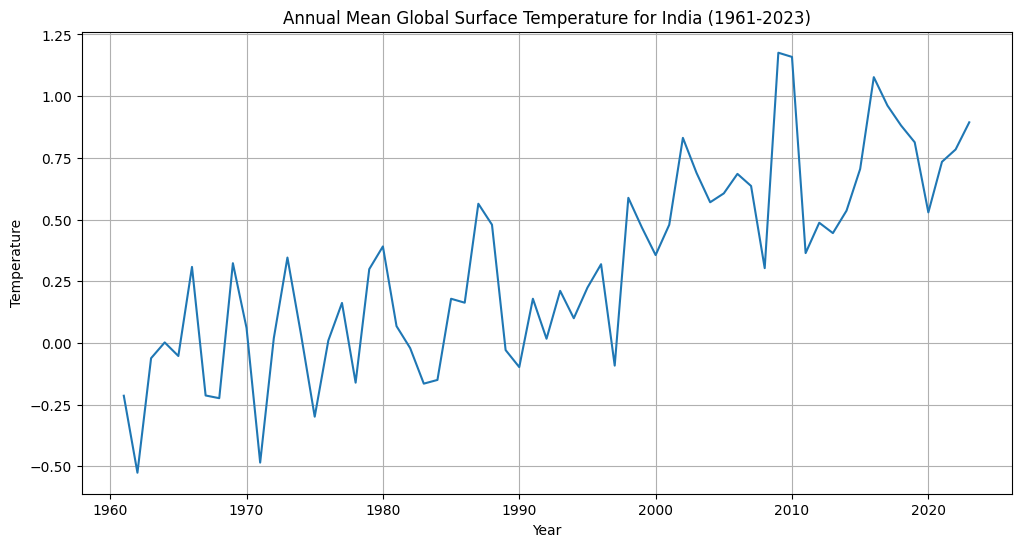

In [ ]:
import matplotlib.pyplot as plt

# Filter data for India
india_data = df[df['Country'] == 'India']
years = list(range(1961, 2024))
year_columns = [str(year) for year in years]

# Select temperatures for India for the specified years
temperatures = india_data.loc[india_data['Country'] == 'India', year_columns].values.flatten()
print(temperatures)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, temperatures)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (1961-2023)')
plt.grid(True)
plt.show()

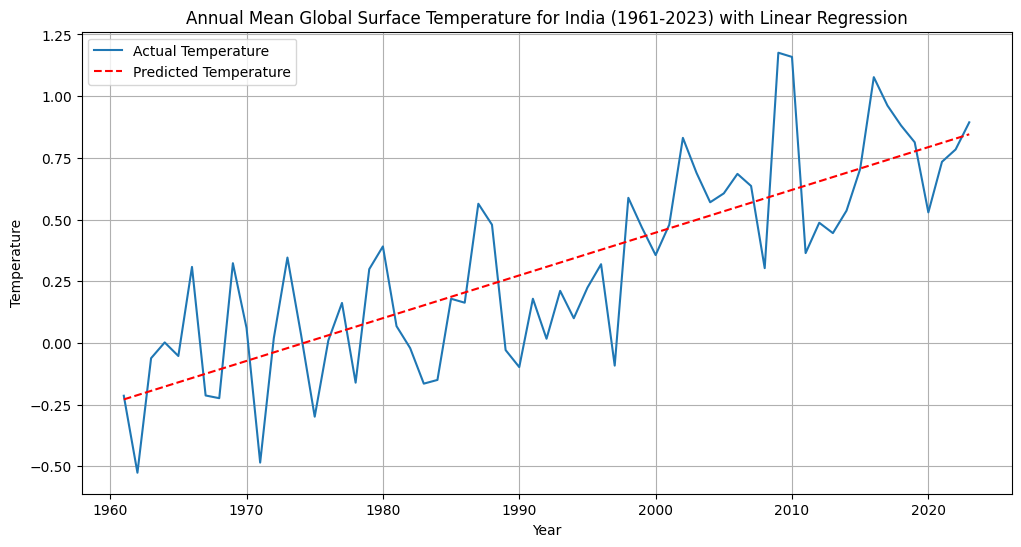

Intercept: -34.21007232462878
Slope: 0.017328485023041476


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data for regression
X = [[year] for year in years]
y = temperatures

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the actual and predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(years, temperatures, label='Actual Temperature')
plt.plot(years, y_pred, label='Predicted Temperature', linestyle='--',color='red')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (1961-2023) with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

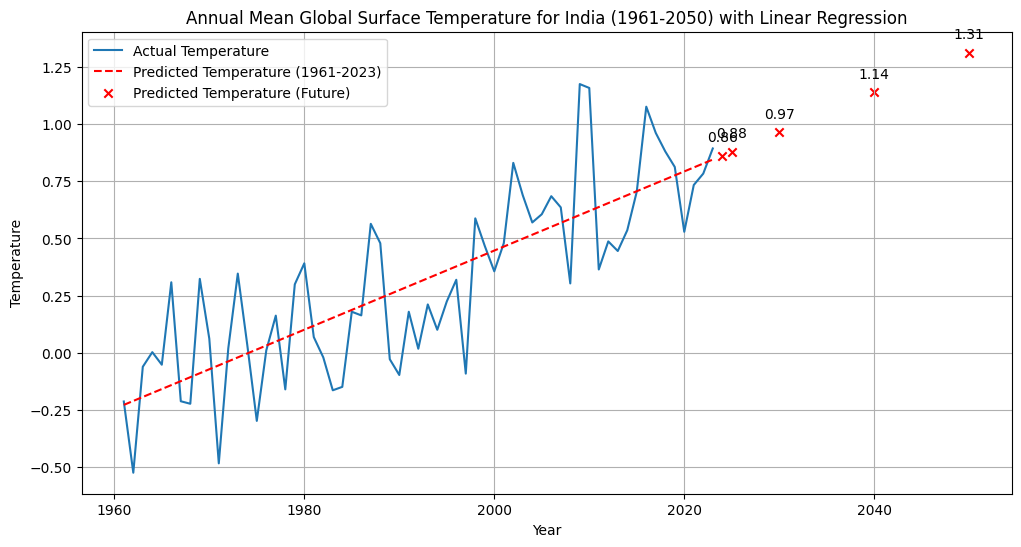

Predicted temperature for 2024: 0.86
Predicted temperature for 2025: 0.88
Predicted temperature for 2030: 0.97
Predicted temperature for 2040: 1.14
Predicted temperature for 2050: 1.31


In [ ]:
# Predict temperatures for future years
future_years = [2024, 2025, 2030, 2040, 2050]
future_X = [[year] for year in future_years]
future_y_pred = model.predict(future_X)

# Plot the actual and predicted temperatures along with future predictions
plt.figure(figsize=(12, 6))
plt.plot(years, temperatures, label='Actual Temperature')
plt.plot(years, y_pred, label='Predicted Temperature (1961-2023)', linestyle='--', color='red')
plt.scatter(future_years, future_y_pred, color='red', label='Predicted Temperature (Future)', marker='x')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (1961-2050) with Linear Regression')
plt.legend()
plt.grid(True)

# Annotate the predicted future temperatures on the plot
for i, txt in enumerate(future_y_pred):
    plt.annotate(f'{txt:.2f}', (future_years[i], future_y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Print the predicted future temperatures
for year, temp in zip(future_years, future_y_pred):
    print(f"Predicted temperature for {year}: {temp:.2f}")

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
from scipy import stats

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")



Mean Squared Error (MSE): 0.05746845380453541
Root Mean Squared Error (RMSE): 0.23972578877654238
Mean Absolute Error (MAE): 0.19309536559546114


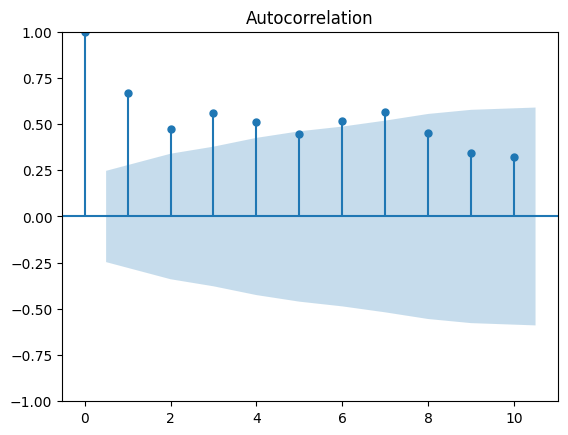

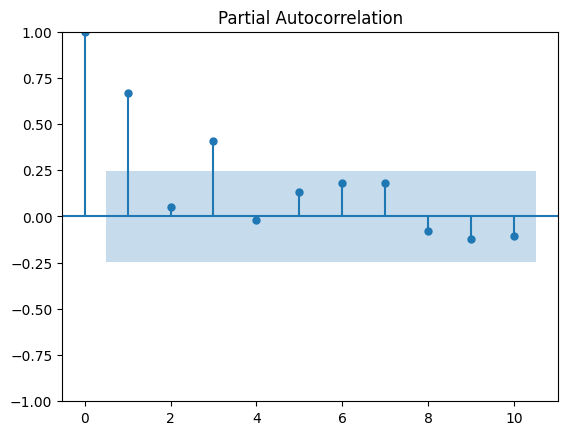

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(temperatures, lags=10)  # Adjust lags as needed
plt.show()

# Plot PACF
plot_pacf(temperatures, lags=10)  # Adjust lags as needed
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(temperatures, autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

ADF Statistic: -0.333389
p-value: 0.920641
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
best_d = None
best_p_value = 1  # Initialize with a high p-value

for d in range(4):  # Try differencing up to 3 times (0 to 3)
    differenced_data = temperatures
    for _ in range(d):
      differenced_data = np.diff(differenced_data)
    if len(differenced_data) < 2:
        break  # Stop if differencing results in too few data points

    result = adfuller(differenced_data, autolag='AIC')
    p_value = result[1]

    if p_value < best_p_value:
        best_p_value = p_value
        best_d = d

print(f"\nBest d value found: {best_d} (p-value = {best_p_value:.4f})")




Best d value found: 1 (p-value = 0.0000)


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

# Fit Auto-ARIMA
stepwise_fit = auto_arima(temperatures, trace=True, suppress_warnings=True)

# Print the best parameters and AIC
print(stepwise_fit.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34.433, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32.350, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32.640, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15.014, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16.852, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=14.030, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=30.723, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=15.942, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12.772, Time=0.32 sec

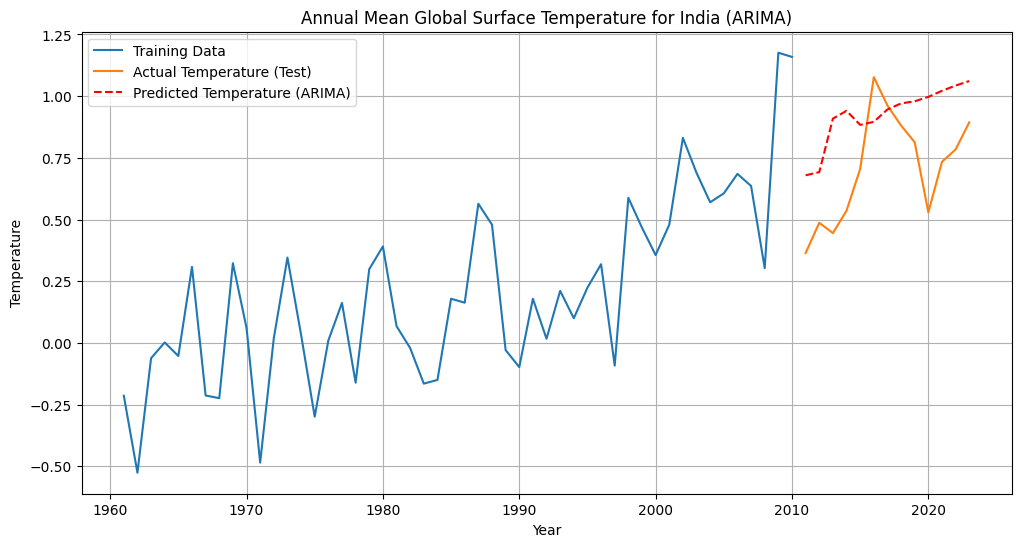

Root Mean Squared Error (RMSE): 0.27978891549344265
Mean Absolute Error (MAE): 0.24630695281713907


In [ ]:
!pip install pmdarima

import pmdarima as pm
from pmdarima import model_selection
import numpy as np
import matplotlib.pyplot as plt


# Split the data into training and testing sets
train_data, test_data = model_selection.train_test_split(temperatures, train_size=0.8)

# Fit an ARIMA model
arima_model = pm.ARIMA(order=(2,1,1))
arima_model.fit(train_data)

# Make predictions
n_periods = len(test_data)
predictions = arima_model.predict(n_periods=n_periods)


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years[:len(train_data)], train_data, label='Training Data')
plt.plot(years[len(train_data):], test_data, label='Actual Temperature (Test)')
plt.plot(years[len(train_data):], predictions, label='Predicted Temperature (ARIMA)', linestyle='--', color='red')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model (example metrics)
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")




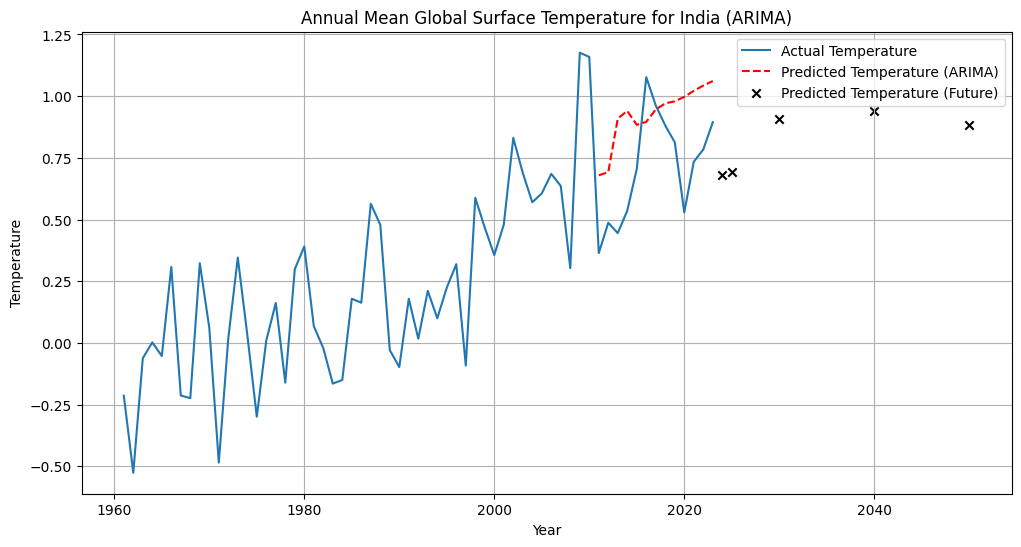

Predicted temperature for 2024: 0.68
Predicted temperature for 2025: 0.69
Predicted temperature for 2030: 0.91
Predicted temperature for 2040: 0.94
Predicted temperature for 2050: 0.88


In [ ]:
# Forecasting future values
future_years = [2024, 2025, 2030, 2040, 2050]
future_predictions = arima_model.predict(n_periods=len(future_years))

plt.figure(figsize=(12, 6))
plt.plot(years, temperatures, label='Actual Temperature')
plt.plot(years[len(train_data):], predictions, label='Predicted Temperature (ARIMA)', linestyle='--', color='red')
plt.scatter(future_years, future_predictions, color='black', label='Predicted Temperature (Future)', marker='x')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()

for year, temp in zip(future_years, future_predictions):
  print(f"Predicted temperature for {year}: {temp:.2f}")

Pros:

Good for short-term forecasting

Only needs historical data

Models non-stationary data

Cons:

Not built for long-term forecasting

Poor at predicting turning points

Computationally expensive

Parameters are subjective

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
timesteps = 7
X, y = [], []
for i in range(len(temperatures) - timesteps):
    X.append(temperatures[i:(i + timesteps)])
    y.append(temperatures[i + timesteps])
X = np.array(X).reshape(-1, timesteps, 1)
y = np.array(y)


# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)




Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1904
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1705 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1714
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1716 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1582 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1365 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1527 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1461 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1309 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1270
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1150
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1069
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1076  
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1053
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0944 
Epoch 16/100
2/2 ━━━━━━━━━━━

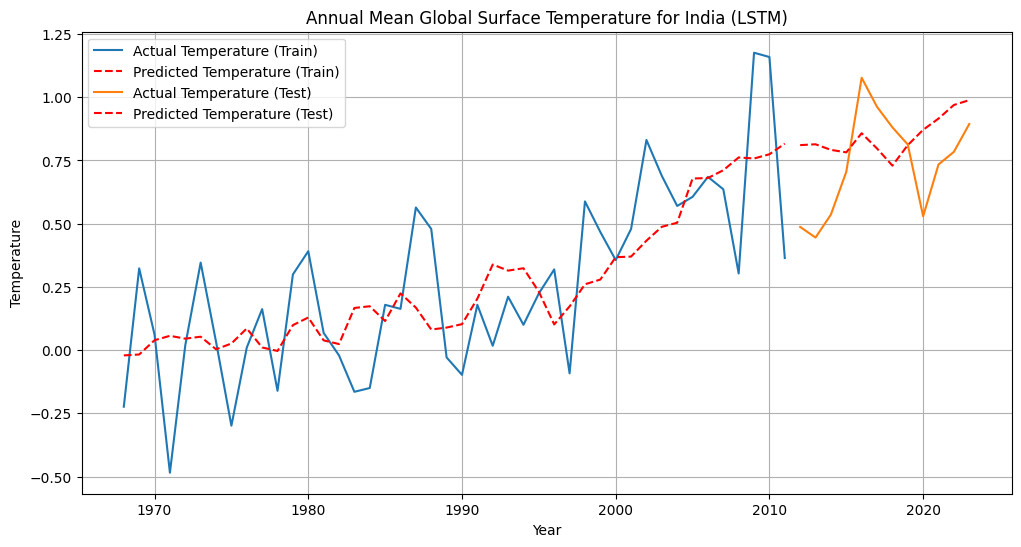

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years[timesteps:split_index+timesteps], y_train, label='Actual Temperature (Train)')
plt.plot(years[timesteps:split_index+timesteps], train_predict, label='Predicted Temperature (Train)', linestyle='--', color='red')
plt.plot(years[split_index+timesteps:], y_test, label='Actual Temperature (Test)')
plt.plot(years[split_index+timesteps:], test_predict, label='Predicted Temperature (Test)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


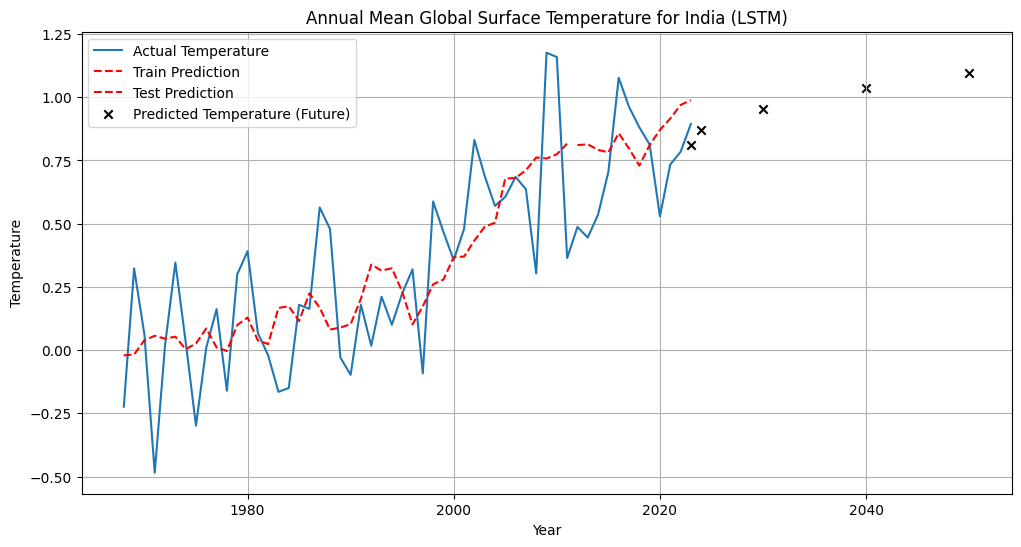

Predicted temperature for 2023: 0.81
Predicted temperature for 2024: 0.87
Predicted temperature for 2030: 0.95
Predicted temperature for 2040: 1.04
Predicted temperature for 2050: 1.10


In [ ]:
# Prepare future data for prediction
future_years = [2023, 2024, 2030, 2040, 2050]
future_X = []
last_sequence = X[-5]  # Use the last sequence from the training data
for year in future_years:
    # Predict the next temperature in the sequence
    next_temp_pred = model.predict(np.array([last_sequence]))[0][0]

    # Append the prediction to the sequence (and remove the oldest value)
    new_sequence = np.append(last_sequence[1:], next_temp_pred)
    future_X.append(next_temp_pred)
    last_sequence = new_sequence.reshape(timesteps, 1)


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(years[timesteps:], y, label='Actual Temperature')
plt.plot(years[timesteps:len(train_predict)+timesteps], train_predict, label='Train Prediction', linestyle='--', color='red')
plt.plot(years[len(train_predict)+timesteps:], test_predict, label='Test Prediction', linestyle='--', color='red')
plt.scatter(future_years, future_X, color='black', label='Predicted Temperature (Future)', marker='x')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Annual Mean Global Surface Temperature for India (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

for year, temp in zip(future_years, future_X):
    print(f"Predicted temperature for {year}: {temp:.2f}")

In [ ]:
# Evaluate the LSTM model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Summarize the LSTM model
print(model.summary())

Train RMSE: 0.2517992425910778
Test RMSE: 0.22429270695072184


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

None
